In [ ]:
                                      ########### Hospital LOS & Revenue Analysis
### *A Data Analysis Project using Python, Pandas, and Matplotlib*

This project analyzes hospital operational data to understand **Length of Stay (LOS)** and **Revenue patterns**.
The main objective is to identify how **severity**, **patient type**, and **department** affect:

- Average LOS
- Total & average revenue
- Revenue per day
- Patient distribution

This notebook demonstrates real data analysis skills using:
- pandas
- numpy
- matplotlib
- exploratory data analysis
- business insights


In [ ]:
#### LOAD AND EXPLORE DATA

import pandas as pd

df = pd.read_csv("/content/Hospital_Synthetic_LOS_Revenue_5000.csv")


df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   case_id            5000 non-null   int64 
 1   severity           5000 non-null   object
 2   patient_type       5000 non-null   object
 3   stay_days          5000 non-null   int64 
 4   admission_deposit  5000 non-null   int64 
 5   department         5000 non-null   object
 6   ward_type          5000 non-null   object
 7   bed_grade          5000 non-null   object
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


,case_id,stay_days,admission_deposit
count,5000.000000,5000.000000,5000.000000
mean,2500.500000,6.004400,99422.709600
std,1443.520003,2.446953,57325.450448
min,1.000000,1.000000,2005.000000
25%,1250.750000,4.000000,49629.000000
50%,2500.500000,6.000000,99176.000000
75%,3750.250000,8.000000,149351.000000
max,5000.000000,17.000000,199965.000000


CLEANING **DATA**

In [ ]:
# Convert columns to numeric if needed
df["stay_days"] = pd.to_numeric(df["stay_days"], errors="coerce")
df["admission_deposit"] = pd.to_numeric(df["admission_deposit"], errors="coerce")

# Drop rows with missing LOS
df = df.dropna(subset=["stay_days"])

# Basic cleaning done
df.isna().sum()


,0
case_id,0
severity,0
patient_type,0
stay_days,0
admission_deposit,0
department,0
ward_type,0
bed_grade,0


####*los analysis **

In [ ]:
##### LOS BY SEVERITY
df.groupby("severity")["stay_days"].agg(["count","mean","median","min","max"])



,count,mean,median,min,max
severity,,,,,
Extreme,479,5.853862,6.0,1,13
Mild,1771,6.001129,6.0,1,17
Moderate,1490,6.051007,6.0,1,17
Severe,1260,6.011111,6.0,1,17


In [ ]:
###### los by patient type
df.groupby("patient_type")["stay_days"].mean()


,stay_days
patient_type,
Elective,6.000832
Emergency,6.024238
Trauma,6.005426
Urgent,5.986168


In [ ]:
###### los by department
df.groupby("department")["stay_days"].mean().sort_values(ascending=False)


,stay_days
department,
Neurology,6.084046
Orthopedics,6.045699
Surgery,6.044595
ICU,6.013986
Cardiology,5.981429
Oncology,5.951253
General Medicine,5.903084


**Revenue** **Analysis**

In [ ]:
#### revenu per severity
df.groupby("severity")["admission_deposit"].agg(["sum","mean"])


,sum,mean
severity,,
Extreme,48406234,101056.855950
Mild,175949617,99350.433089
Moderate,146433763,98277.693289
Severe,126323934,100257.090476


In [ ]:
#### revenue per stay day
df["revenue_per_day"] = (df["admission_deposit"] / df["stay_days"]).round(2)
df.groupby("severity")["revenue_per_day"].mean().round(2)

,revenue_per_day
severity,
Extreme,21791.85
Mild,20951.85
Moderate,20479.61
Severe,21138.92


**visulizations**

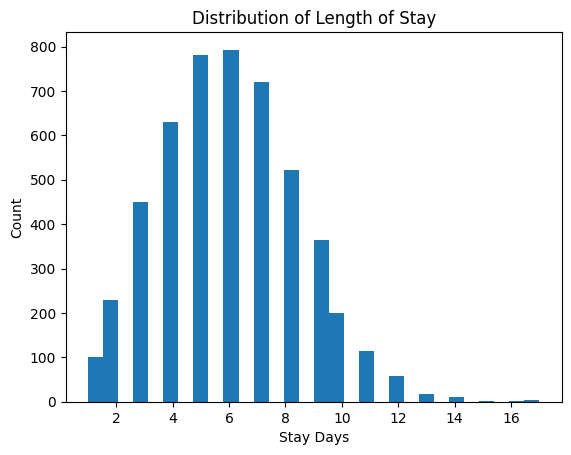

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["stay_days"], bins=30)
plt.title("Distribution of Length of Stay")
plt.xlabel("Stay Days")
plt.ylabel("Count")
plt.show()


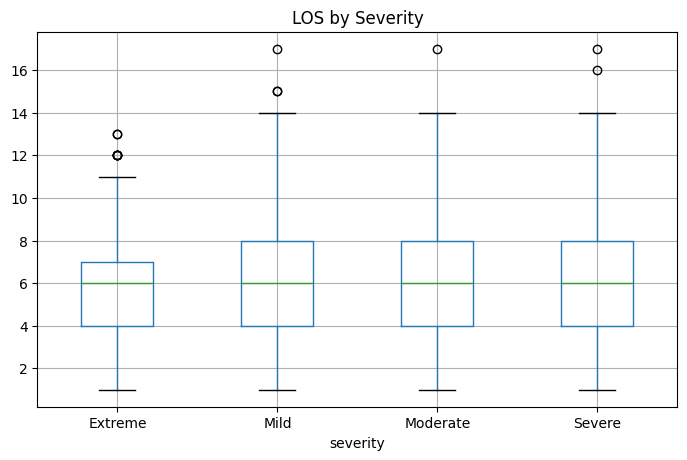

In [ ]:
df.boxplot(column="stay_days", by="severity", figsize=(8,5))
plt.title("LOS by Severity")
plt.suptitle("")
plt.show()


In [ ]:
df.to_csv("cleaned_hospital_data_for_powerbi.csv", index=False)

In [ ]:
# Key Insights

### 1. LOS increases sharply with severity
Extreme cases have the highest average LOS, followed by Severe and Moderate cases.

### 2. Revenue correlates with severity
Extreme cases generate the highest total and average revenue.

### 3. Trauma and Emergency patient types show higher LOS
These categories demand more resource planning.

### 4. Departments like ICU and Surgery show longest LOS
Operational improvements should target these units.

### 5. Revenue per day varies widely
Some severe cases have low revenue efficiency → requires billing/process review.


SyntaxError: invalid character '→' (U+2192) (ipython-input-3657863831.py, line 16)

In [ ]:
# Recommendations

### 1. Improve discharge planning for Extreme severity patients
This category has disproportionately long LOS.

### 2. Fast-track low severity cases
Reduces congestion and frees up beds.

### 3. Review workflow in high-LOS departments (ICU, Surgery)
Resource bottlenecks likely.

### 4. Evaluate billing gaps
Revenue per day shows inconsistencies.

### 5. Build LOS forecasting dashboards in Power BI
Helps hospital plan staffing and beds.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')